In [31]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

%matplotlib inline

from NFW import NFW

Remember: 500 solar masses is the mass per particle

# THIS PART WORKS WITH NO RADIATIVE TRANSFER (NO RT)

In [32]:
전data290_noRT = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 no RT/dwarf_dm_5e8_0290.txt")
dx290_noRT = 전data290_noRT[:,4]
dy290_noRT = 전data290_noRT[:,5]
dz290_noRT = 전data290_noRT[:,6]
r290_noRT = np.sqrt(dx290_noRT**2 + dy290_noRT**2 + dz290_noRT**2) # max: 11333.935323605565 pc, closest to 11340
rad_array290_noRT = np.arange(10, 11340, 10, dtype=np.int64) # unit: pc
density_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
i = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT > radius_value) & (r290_noRT < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile290_noRT[i] = how_many_particles / shell_volume
    i += 1
densityprof290_noRT = density_profile290_noRT / density_profile290_noRT[1]

In [33]:
mass_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
h = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    mass_profile290_noRT[h] = how_many_particles * 500
    h += 1

## generating 2 NFW profiles with 2 different masses.
## the one called "halo6" will be the main one running.

In [34]:
# the mass equals to the mass of the last data point that Jeon collected.

halo6 = NFW(mass_profile290_noRT[np.size(mass_profile290_noRT) - 1]) # NFW using total mass of the dwarf in the data file
r_s6 = halo6.r_s()
c_vir6 = halo6.c_vir()
print('r_s =', r_s6)
print('c_vir =', c_vir6)

radius6 = np.arange(0.01, 11.34, 0.01) #unit: kpc

r_s = 0.9768300377488506
c_vir = 18.041947430034675


In [35]:
# the mass is made up by Dr Besla to estimate m_vir

halo6_1 = NFW(2.85e8) # NFW using M_200 / 0.87
r_s6_1 = halo6_1.r_s()
c_vir6_1 = halo6_1.c_vir()
print('r_s =', r_s6_1)
print('c_vir =', c_vir6_1)

radius6_1 = np.arange(0.01, 11.34, 0.01) #unit: kpc

r_s = 0.9404201093284129
c_vir = 18.16826652958019


## plotting the density & mass profiles at this redshift (unnormalized)

In [36]:
'''this is to set in stone some of the variables we'll use later'''

dx290_noRT = 전data290_noRT[:,4] / 1000 # converting pc to kpc
dy290_noRT = 전data290_noRT[:,5] / 1000 # converting pc to kpc
dz290_noRT = 전data290_noRT[:,6] / 1000 # converting pc to kpc
r290_noRT = np.sqrt(dx290_noRT**2 + dy290_noRT**2 + dz290_noRT**2) # max: 11.333935323605565 pc, closest to 11.340 pc
rad_array290_noRT = np.arange(0.01, 11.34, 0.01) # unit: kpc

density_profile290_noRT = np.zeros(np.size(rad_array290_noRT))
i = 0
for radius_value in rad_array290_noRT:
    particles = np.where((r290_noRT > radius_value) & (r290_noRT < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile290_noRT[i] = how_many_particles / shell_volume
    i += 1

# this finds density that best corresponds to the critical density
rho_crit = 161.7
deviation_from_rho_crit = abs(density_profile290_noRT * 500 - rho_crit)
index = np.where(deviation_from_rho_crit == min(deviation_from_rho_crit))
rad_at_rho_crit = rad_array290_noRT[index][0]

# this finds density that best corresponds to 200 times the critical density
density200 = rho_crit * 200
deviate = abs(density_profile290_noRT * 500 - density200)
ind = np.where(deviate == min(deviate))
rad200 = rad_array290_noRT[ind][0]
mass_at_200_times_rho_crit = mass_profile290_noRT[ind][0] 

# this defines the NFW profile
density_profile6 = halo6.rho(radius6)
density_profile6_1 = halo6_1.rho(radius6_1)

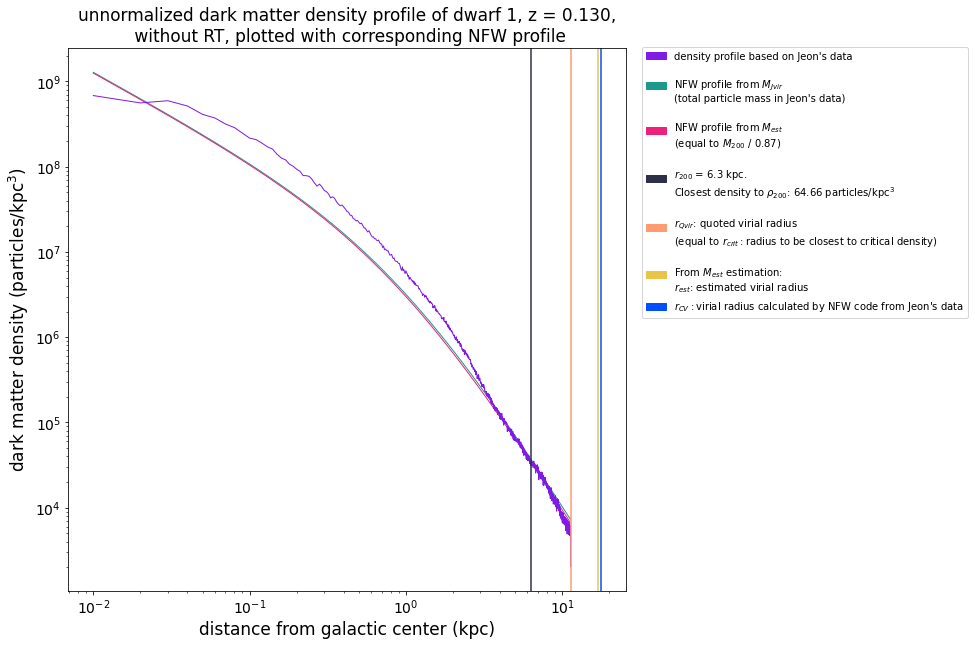

In [37]:
'''PLOTTING THE DENSITY PROFILE'''

fig, ax = plt.subplots(figsize=[10, 10])

plt.plot(radius6, density_profile6, color='#1B998B', linewidth=1)
plt.plot(radius6_1, density_profile6_1, color='#ED217C', linewidth=1)
plt.plot(radius6, density_profile290_noRT * 500, color=(0.5, 0.1, 0.9, 1), linewidth=1)
plt.axvline(rad200, color='#2D3047')
plt.axvline(1.133394e+04 * 0.001, color='#FF9B71')
plt.axvline(halo6_1.r_vir(), color='#E8C547')
plt.axvline(halo6.r_vir(), color='#004FFF')
notec = mpatches.Patch(color=(0.5, 0.1, 0.9, 1), label="density profile based on Jeon's data")
notea = mpatches.Patch(color='#1B998B', label="\nNFW profile from $M_{Jvir}$\n(total particle mass in Jeon's data)")
noteb = mpatches.Patch(color='#ED217C', label="\nNFW profile from $M_{est}$\n(equal to $M_{200}$ / 0.87)")
note1 = mpatches.Patch(color='#2D3047', label="\n$r_{200}$ = " + str(rad200) + " kpc.\nClosest density to $ρ_{200}$: " + \
str(round(density_profile290_noRT[ind][0], 2)) + " particles/kpc$^3$")
note2 = mpatches.Patch(color='#FF9B71', label="\n$r_{Qvir}$: quoted virial radius\n(equal to $r_{crit}:$radius to be closest to critical density)")
note3 = mpatches.Patch(color='#E8C547', label="\nFrom $M_{est}$ estimation:\n$r_{est}$: estimated virial radius")
note4 = mpatches.Patch(color='#004FFF', label="$r_{CV}:$virial radius calculated by NFW code from Jeon's data")
plt.legend(handles=[notec, notea, noteb, note1, note2, \
                    note3, note4], bbox_to_anchor=(1.02, 1.01), loc='upper left')

plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density (particles/kpc$^3$)', fontsize=17) # using LATEX here!
plt.title('unnormalized dark matter density profile of dwarf 1, z = 0.130,\n without RT, plotted with corresponding NFW profile', loc='center', fontsize=17)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.show()

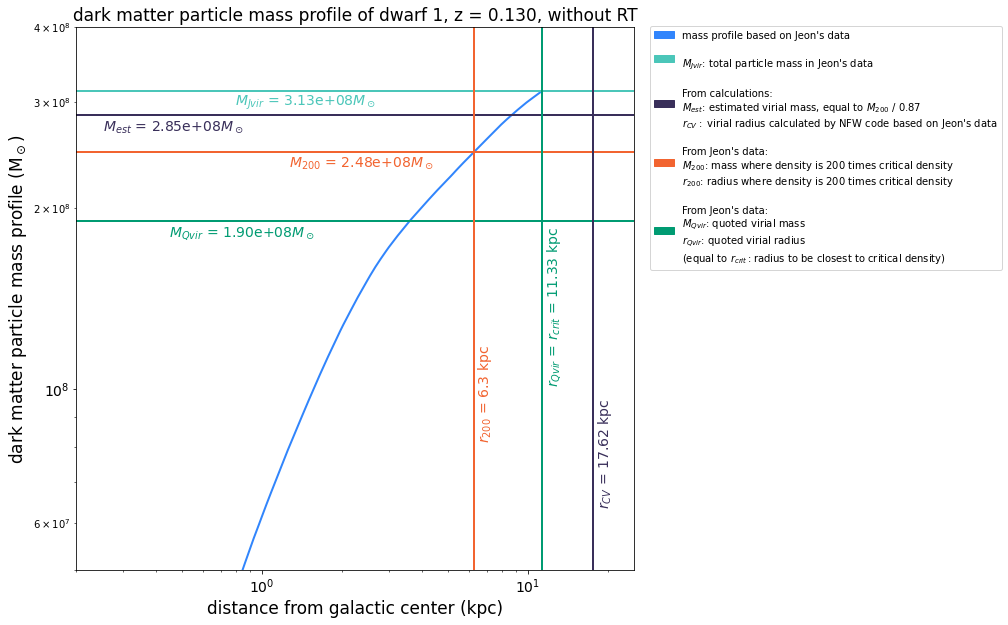

In [38]:
'''PLOTTING THE MASS PROFILE'''

plt.figure(figsize=(10,10))

# the main plot from Jeon's data
plt.plot(radius6, mass_profile290_noRT, color='#3185FC', linewidth=2)

# all the horizontal lines
plt.axhline(mass_profile290_noRT[np.size(mass_profile290_noRT) - 1], color='#4BC6B9', linewidth=2)
plt.axhline(1.903021e+08, color='#009B72', linewidth=2)
plt.axhline(mass_at_200_times_rho_crit / 0.87, color='#392F5A', linewidth=2)
plt.axhline(mass_at_200_times_rho_crit, color='#F26430', linewidth=2)

# all the vertical lines
plt.axvline(1.133394e+04 * 0.001, color='#009B72', linewidth=2) #r_vir quoted by Jeon
plt.axvline(rad200, color='#F26430', linewidth=2) #r200
plt.axvline(halo6.r_vir(), color='#392F5A', linewidth=2) #r_vir from calculations

# separate legends
legend1 = mpatches.Patch(color='#3185FC', label="mass profile based on Jeon's data")

legend2 = mpatches.Patch(color='#4BC6B9', label="\n$M_{Jvir}$: total particle mass in Jeon's data")
legend3 = mpatches.Patch(color='#392F5A', label="\nFrom calculations:\n$M_{est}$: estimated virial mass, equal to $M_{200}$ / 0.87\n$r_{CV}:$ virial radius calculated by NFW code based on Jeon's data")
legend4 = mpatches.Patch(color='#F26430', \
                         label="\nFrom Jeon's data:\n$M_{200}$: mass where density is 200 times critical density\n$r_{200}$: radius where density is 200 times critical density")
legend5 = mpatches.Patch(color='#009B72', \
                         label="\nFrom Jeon's data:\n$M_{Qvir}$: quoted virial mass\n$r_{Qvir}$: quoted virial radius\n(equal to $r_{crit}:$radius to be closest to critical density)")

plt.legend(handles=[legend1, legend2, legend3, legend4, legend5], bbox_to_anchor=(1.02, 1.01), loc='upper left')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter particle mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10**-0.7, 10**1.4)
plt.ylim(5e7, 4e8)
plt.xscale('log')
plt.yscale('log')    

plt.title('dark matter particle mass profile of dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)

plt.text(10**-0.1, 10**8.471, '''$M_{Jvir}$ = ''' + str(format(mass_profile290_noRT[np.size(mass_profile290_noRT) - 1], '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#4BC6B9') #y = 10**8.46
plt.text(10**-0.6, 10**8.431, '''$M_{est}$ = ''' + str(format(mass_at_200_times_rho_crit / 0.87, '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#392F5A') #y = 10**7.795
plt.text(10**0.1, 10**8.371, '''$M_{200}$ = ''' + str(format(mass_at_200_times_rho_crit, '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#F26430') #y = 10**7.73
plt.text(10**-0.35, 10**8.255, '''$M_{Qvir}$ = ''' + str(format(1.903021e+08, '.2e')) +  '''$M_\odot$''', \
         fontsize=14, color='#009B72') #y = 10**8.24

plt.text(10**0.805, 10**7.92, '''$r_{200}$ = ''' + str(round(rad200, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#F26430') #y = 10**7.5
plt.text(10**1.065, 10**8.013, '''$r_{Qvir}$ = $r_{crit}$ = ''' + str(round(1.133394e+04 * 0.001, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#009B72') #y = 10**7.9
plt.text(10**1.255, 10**7.81, '''$r_{CV}$ = ''' + str(round(halo6.r_vir(), 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#392F5A') #y = 10**7.51

plt.show()

# THIS PART WORKS WITH RADIATIVE TRANSFER (RT)

In [24]:
전data290 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dwarf 1 RT/dwarf_dm_5e8_rt_0290.txt")
dx290 = 전data290[:,4]
dy290 = 전data290[:,5]
dz290 = 전data290[:,6]
r290 = np.sqrt(dx290**2 + dy290**2 + dz290**2) # max: 11415.825965662318, closest to 11420
rad_array290 = np.arange(10, 11420, 10, dtype=np.int64)
density_profile290 = np.zeros(np.size(rad_array290))
i = 0
for radius_value in rad_array290:
    particles = np.where((r290 > radius_value) & (r290 < (radius_value + 10)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 10)**3 - radius_value**3)
    density_profile290[i] = how_many_particles / shell_volume
    i += 1
densityprof290 = density_profile290 / density_profile290[1]

In [25]:
mass_profile290 = np.zeros(np.size(rad_array290))
h = 0
for radius_value in rad_array290:
    particles = np.where((r290 < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    mass_profile290[h] = how_many_particles * 500
    h += 1

## generating 2 NFW profiles with 2 different masses.
## the one called "halo6" will be the main one running.

In [26]:
# the mass equals to the mass of the last data point that Jeon collected.

halo7 = NFW(mass_profile290[np.size(mass_profile290) - 1]) # NFW using total mass of the dwarf in the data file
r_s7 = halo7.r_s()
c_vir7 = halo7.c_vir()
print('r_s =', r_s7)
print('c_vir =', c_vir7)

radius7 = np.arange(0.01, 11.42, 0.01) #unit: kpc

r_s = 0.9853784583446804
c_vir = 18.01309676379171


In [27]:
# the mass is made up by Dr Besla to estimate m_vir

halo7_1 = NFW(6.71e7) # NFW using M_200 / 0.87
r_s7_1 = halo7_1.r_s()
c_vir7_1 = halo7_1.c_vir()
print('r_s =', r_s7_1)
print('c_vir =', c_vir7_1)

radius7_1 = np.arange(0.01, 11.42, 0.01) #unit: kpc

r_s = 0.5210010738697193
c_vir = 20.249889974784185


## plotting the density & mass profiles at this redshift (unnormalized)

In [28]:
'''this is to set in stone some of the variables we'll use later'''

dx290 = 전data290[:,4] / 1000 # converting data in pc to kpc
dy290 = 전data290[:,5] / 1000 # converting data in pc to kpc
dz290 = 전data290[:,6] / 1000 # converting data in pc to kpc
r290 = np.sqrt(dx290**2 + dy290**2 + dz290**2) # max: 11.415825965662318 kpc, closest to 11.42 kpc
rad_array290 = np.arange(0.01, 11.42, 0.01) # bin size: 0.01 kpc
density_profile290 = np.zeros(np.size(rad_array290))
i = 0
for radius_value in rad_array290:
    particles = np.where((r290 > radius_value) & (r290 < (radius_value + 0.01)))
    how_many_particles = np.size(particles)
    shell_volume = 4/3*np.pi*((radius_value + 0.01)**3 - radius_value**3)
    density_profile290[i] = how_many_particles / shell_volume
    i += 1
    
# this finds density that best corresponds to the critical density
rho_crit = 161.7
deviation2 = abs(density_profile290 * 500 - rho_crit)
quelque_part = np.where(deviation2 == min(deviation2))
rad_rho_crit = rad_array290[quelque_part][0]

# this finds density that best corresponds to 200 times the critical density
density200 = rho_crit * 200
deviate2 = abs(density_profile290 * 500 - density200)
quelque_part2 = np.where(deviate2 == min(deviate2))
radius200 = rad_array290[quelque_part2][0]
mass_200rhocrit = mass_profile290[quelque_part2][0] 

# this defines the NFW profile
density_profile7 = halo7.rho(radius7)
density_profile7_1 = halo7_1.rho(radius7_1)

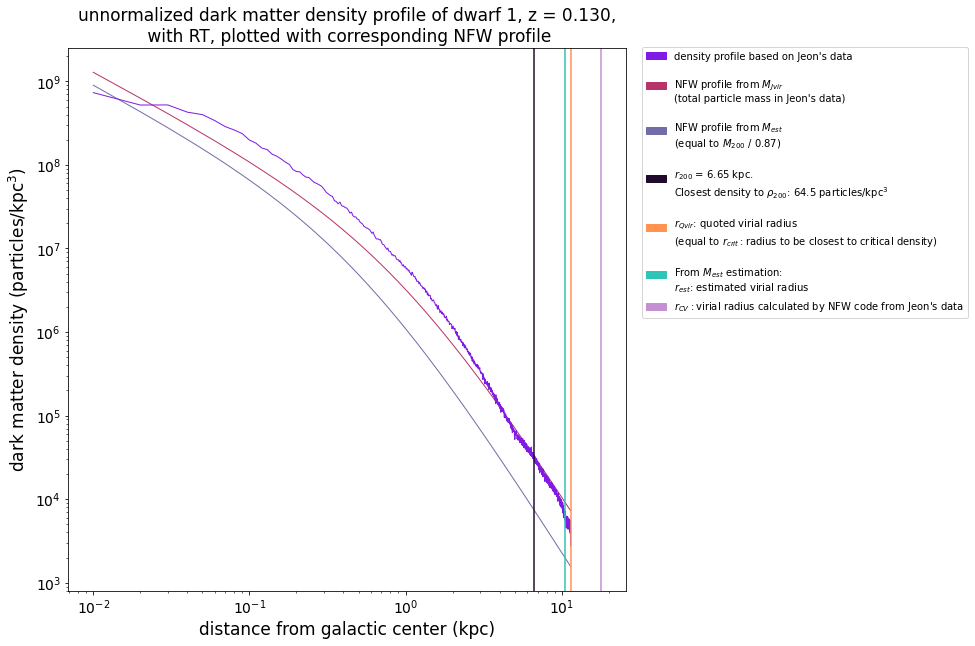

In [29]:
'''PLOTTING THE DENSITY PROFILE'''

plt.figure(figsize=(10, 10))

plt.plot(radius7, density_profile7, color='#B8336A', linewidth=1)
plt.plot(radius7_1, density_profile7_1, color='#726DA8', linewidth=1)
plt.plot(radius7, density_profile290 * 500, color=(0.5, 0.1, 0.9, 1), linewidth=1)
plt.axvline(radius200, color='#210B2C') 
plt.axvline(1.141584e+04 * 0.001, color='#FF934F')
plt.axvline(halo7_1.r_vir(), color='#2EC4B6')
plt.axvline(halo7.r_vir(), color='#C490D1')
notec = mpatches.Patch(color=(0.5, 0.1, 0.9, 1), label="density profile based on Jeon's data")
notea = mpatches.Patch(color='#B8336A', label="\nNFW profile from $M_{Jvir}$\n(total particle mass in Jeon's data)")
noteb = mpatches.Patch(color='#726DA8', label="\nNFW profile from $M_{est}$\n(equal to $M_{200}$ / 0.87)")
note1 = mpatches.Patch(color='#210B2C', label="\n$r_{200}$ = " + str(radius200) + " kpc.\nClosest density to $ρ_{200}$: " + \
str(round(density_profile290[quelque_part2][0], 2)) + " particles/kpc$^3$")
note2 = mpatches.Patch(color='#FF934F', label="\n$r_{Qvir}$: quoted virial radius\n(equal to $r_{crit}:$radius to be closest to critical density)")
note3 = mpatches.Patch(color='#2EC4B6', label="\nFrom $M_{est}$ estimation:\n$r_{est}$: estimated virial radius")
note4 = mpatches.Patch(color='#C490D1', label="$r_{CV}:$virial radius calculated by NFW code from Jeon's data")

plt.legend(handles=[notec, notea, noteb, \
                   note1, note2, note3, note4], bbox_to_anchor=(1.02, 1.01), loc='upper left')
        
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter density (particles/kpc$^3$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')    

plt.title('unnormalized dark matter density profile of dwarf 1, z = 0.130,\n with RT, plotted with corresponding NFW profile', loc='center', fontsize=17)

plt.show()

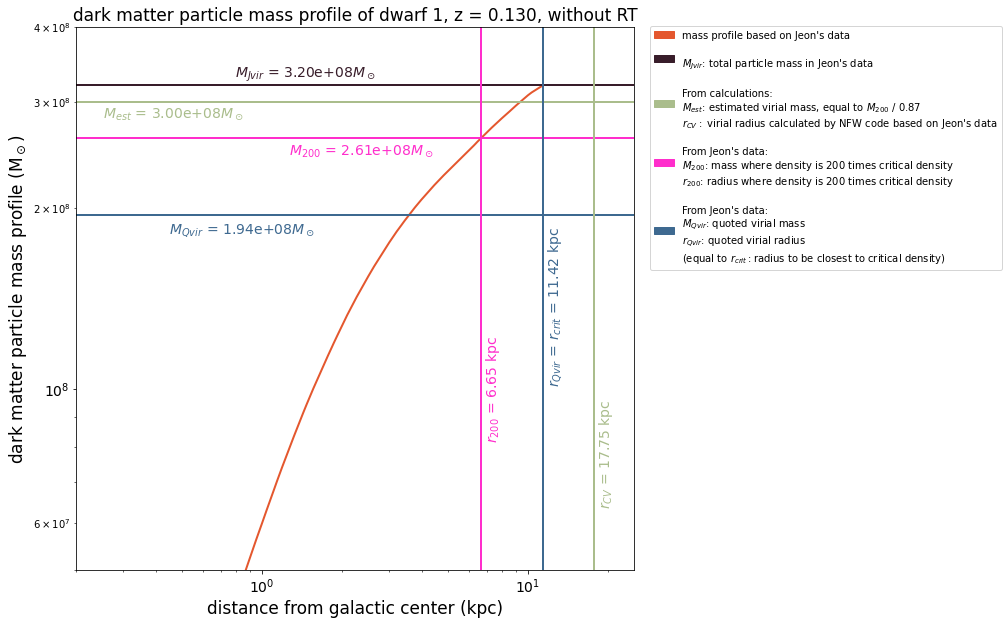

In [39]:
'''PLOTTING THE MASS PROFILE'''

plt.figure(figsize=(10,10))

# the main plot from Jeon's data
plt.plot(radius7, mass_profile290, color='#E4572E', linewidth=2)

# all the horizontal lines
plt.axhline(mass_profile290[np.size(mass_profile290) - 1], color='#381D2A', linewidth=2)
plt.axhline(1.944113e+08, color='#3E6990', linewidth=2)
plt.axhline(mass_200rhocrit / 0.87, color='#AABD8C', linewidth=2)
plt.axhline(mass_200rhocrit, color='#FF2ECC', linewidth=2)

# all the vertical lines
plt.axvline(1.141584e+04 * 0.001, color='#3E6990', linewidth=2) #r_vir quoted by Jeon
plt.axvline(radius200, color='#FF2ECC', linewidth=2) #r200
plt.axvline(halo7.r_vir(), color='#AABD8C', linewidth=2) #r_vir from calculations

# separate legends
legend1 = mpatches.Patch(color='#E4572E', label="mass profile based on Jeon's data")

legend2 = mpatches.Patch(color='#381D2A', label="\n$M_{Jvir}$: total particle mass in Jeon's data")
legend3 = mpatches.Patch(color='#AABD8C', label="\nFrom calculations:\n$M_{est}$: estimated virial mass, equal to $M_{200}$ / 0.87\n$r_{CV}:$ virial radius calculated by NFW code based on Jeon's data")
legend4 = mpatches.Patch(color='#FF2ECC', \
                         label="\nFrom Jeon's data:\n$M_{200}$: mass where density is 200 times critical density\n$r_{200}$: radius where density is 200 times critical density")
legend5 = mpatches.Patch(color='#3E6990', \
                         label="\nFrom Jeon's data:\n$M_{Qvir}$: quoted virial mass\n$r_{Qvir}$: quoted virial radius\n(equal to $r_{crit}:$radius to be closest to critical density)")

plt.legend(handles=[legend1, legend2, legend3, legend4, legend5], bbox_to_anchor=(1.02, 1.01), loc='upper left')
    
plt.xlabel('distance from galactic center (kpc)', fontsize=17)
plt.ylabel('dark matter particle mass profile (M$_\odot$)', fontsize=17) # using LATEX here!
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(10**-0.7, 10**1.4)
plt.ylim(5e7, 4e8)
plt.xscale('log')
plt.yscale('log')    

plt.title('dark matter particle mass profile of dwarf 1, z = 0.130, without RT', loc='center', fontsize=17)

plt.text(10**-0.1, 10**8.519, '''$M_{Jvir}$ = ''' + str(format(mass_profile290[np.size(mass_profile290) - 1], '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#381D2A') 
plt.text(10**-0.6, 10**8.452, '''$M_{est}$ = ''' + str(format(mass_200rhocrit / 0.87, '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#AABD8C') 
plt.text(10**0.1, 10**8.391, '''$M_{200}$ = ''' + str(format(mass_200rhocrit, '.2e')) + \
         '''$M_\odot$''', fontsize=14, color='#FF2ECC') 
plt.text(10**-0.35, 10**8.259, '''$M_{Qvir}$ = ''' + str(format(1.944113e+08, '.2e')) +  '''$M_\odot$''', \
         fontsize=14, color='#3E6990')

plt.text(10**0.835, 10**7.92, '''$r_{200}$ = ''' + str(round(radius200, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#FF2ECC')
plt.text(10**1.07, 10**8.013, '''$r_{Qvir}$ = $r_{crit}$ = ''' + str(round(1.141584e+04 * 0.001, 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#3E6990')
plt.text(10**1.261, 10**7.81, '''$r_{CV}$ = ''' + str(round(halo7.r_vir(), 2)) + ''' kpc''', \
         rotation=90, fontsize=14, color='#AABD8C')

plt.show()